In [385]:
pip install pandas

Note: you may need to restart the kernel to use updated packages.


In [386]:
pip install scipy

Note: you may need to restart the kernel to use updated packages.


In [387]:
pip install matplotlib

Note: you may need to restart the kernel to use updated packages.


In [388]:
pip install seaborn

Note: you may need to restart the kernel to use updated packages.


In [389]:
pip install sklearn-pandas

In [390]:
import pandas as pd
import numpy as np
import scipy.stats as stats
from scipy.stats import kstest, anderson_ksamp
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

In [391]:
df  = pd.read_csv('train.csv')

In [392]:
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [393]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

Как видим, в датасете присутствуют столбцы с критически низким уровнем заполнения. Попытки заполнить эти столбцы "замещающей" информацией приведут к дезинформации, так что мы их попросту удалим. Это следующие столбцы (тип доступа к переулку, тип облицовки каменной кладки, качество камина, качество бассейна, качество забора, разные характеристики, не охваченные другими категориями).

In [394]:
df.drop(['Alley', 'MasVnrType', 'FireplaceQu', 'PoolQC', 'Fence', 'MiscFeature'], axis=1, inplace=True)

Остальные столбцы с отсутствующими значениями проверим на нормальность распределения, для принятия решения о методе заполннения "замещающей" информацией.

In [395]:
data_LotFrontage = df[df['LotFrontage'].notna()]

In [396]:
stats.shapiro(data_LotFrontage['LotFrontage'])

ShapiroResult(statistic=np.float64(0.8804028736502089), pvalue=np.float64(2.0016921293556985e-29))

In [397]:
data_MasVnrArea = df[df['MasVnrArea'].notna()]
stats.shapiro(data_MasVnrArea['MasVnrArea'])

ShapiroResult(statistic=np.float64(0.6392859612728288), pvalue=np.float64(6.556644985817981e-48))

In [398]:
data_GarageYrBlt = df[df['GarageYrBlt'].notna()]
stats.shapiro(data_GarageYrBlt['GarageYrBlt'])

ShapiroResult(statistic=np.float64(0.9209431637948045), pvalue=np.float64(2.816782830710865e-26))

Т.к. во всех случаях p-value<alpha(0.05), данные не считаем нормально распределенными. Значит прменять для этих столбцов будем медиану, для остальных - использовать будем моду (так как столбцы имеют строковое значение).

In [399]:
mean_LotFrontage = df['LotFrontage'].median()
df['LotFrontage'] = df['LotFrontage'].fillna(mean_LotFrontage)

In [400]:
mean_MasVnrArea = df['MasVnrArea'].median()
df['MasVnrArea'] = df['MasVnrArea'].fillna(mean_MasVnrArea)

In [401]:
mean_GarageYrBlt = df['GarageYrBlt'].median()
df['GarageYrBlt'] = df['GarageYrBlt'].fillna(mean_GarageYrBlt)

In [402]:
for column in ['BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Electrical', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond']:
    df[column] = df[column].fillna(df[column].mode()[0])

In [403]:
duplicates = df.duplicated

In [404]:
duplicates_df = df[duplicates]

In [405]:
duplicates_df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice


Дубликатов не было. Это хорошо. Все типы данных соответствуют значениям. В целях обучения изменю значения в столбце "Центральное кондиционирование воздуха" и преобразую тип с str в int.

In [406]:
df['CentralAir'].replace('Y', '1', inplace=True)
df['CentralAir'].replace('N', '0', inplace=True)
df['CentralAir'] = df['CentralAir'].astype(int)
df['CentralAir']

C:\Users\mariy\AppData\Local\Temp\ipykernel_85316\3412110742.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['CentralAir'].replace('Y', '1', inplace=True)
C:\Users\mariy\AppData\Local\Temp\ipykernel_85316\3412110742.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For exa

0       1
1       1
2       1
3       1
4       1
       ..
1455    1
1456    1
1457    1
1458    1
1459    1
Name: CentralAir, Length: 1460, dtype: int64

In [407]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 75 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1460 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   LotShape       1460 non-null   object 
 7   LandContour    1460 non-null   object 
 8   Utilities      1460 non-null   object 
 9   LotConfig      1460 non-null   object 
 10  LandSlope      1460 non-null   object 
 11  Neighborhood   1460 non-null   object 
 12  Condition1     1460 non-null   object 
 13  Condition2     1460 non-null   object 
 14  BldgType       1460 non-null   object 
 15  HouseStyle     1460 non-null   object 
 16  OverallQual    1460 non-null   int64  
 17  OverallCond    1460 non-null   int64  
 18  YearBuil

И так, данные причесаны. Можно приступать к анализу.

Каково распределение целевой переменной 'SalePrice'? Есть ли какие-либо выбросы?

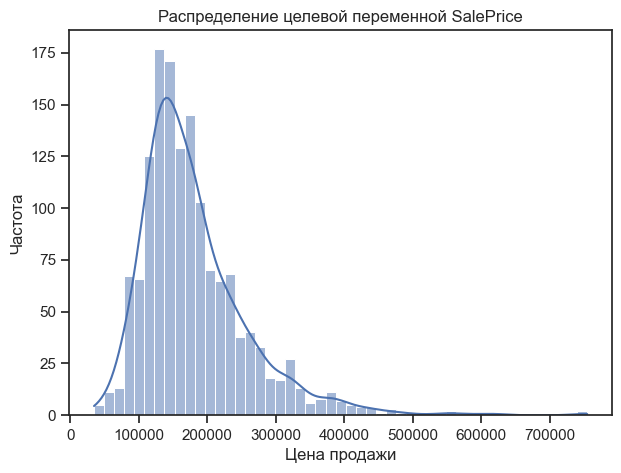

In [408]:
plt.figure(figsize=(7, 5))
sns.histplot(df['SalePrice'], kde=True)
plt.title('Распределение целевой переменной SalePrice')
plt.xlabel('Цена продажи')
plt.ylabel('Частота')
plt.show()

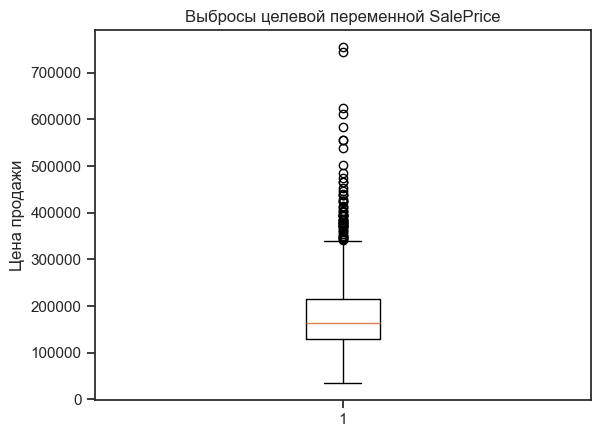

In [409]:
plt.boxplot(df['SalePrice'])
plt.title('Выбросы целевой переменной SalePrice')
plt.ylabel('Цена продажи')
plt.show()

Гистограмма показывает, что цена продажи имеет асимметричное распределение. Ящик с усами демонстрирует, что все объекты недвижимости с ценой выше 3,5 млн. можно считать выбросами.

Исследуйте взаимосвязи между целевой переменной и другими характеристиками. Есть ли сильные корреляции?

В нашем случае, целевая переменная - это стоимость дома. Посмотрим корреляции с переменной.

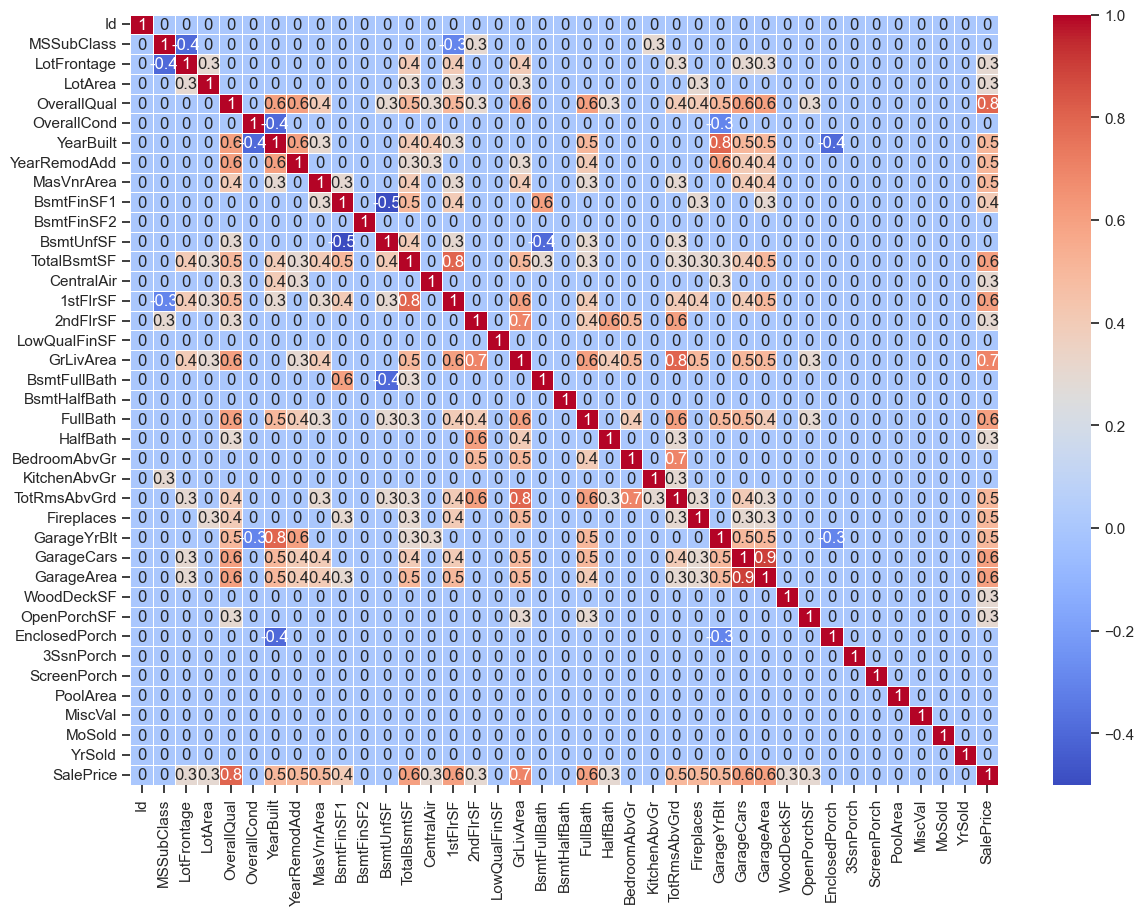

In [411]:
corr_matrix = df.corr(numeric_only=True)
corr_matrix = np.round(corr_matrix, 1)
corr_matrix[np.abs(corr_matrix) < 0.3] = 0
plt.figure(figsize=(14, 10))
sns.heatmap(corr_matrix, annot=True, linewidths=0.5, cmap='coolwarm');

Как можно заметить из тепловой матрицы, наиболее сильная корреляция стоимости продажи с общим качеством материала и отделки. Так же прослеживается сильная корреляция с размером жилой площади, с общей площадью подвала, площадью первого этажа, количеством ванных комнат, а так же размером гаража, в том числе из расчета машиномест.

Исследуйте распределение и взаимосвязи других важных характеристик, таких как 'OverallQual', 'GrLivArea', 'GarageCars' и т.д. d

OverallQual: как видим, имеется достаточно сильная взаимосвязь у общего качества материала и отделки с годом постройки, годом реставрации, площадью жилья, количеством ванных комнат (неожиданно!), а так же размером гаража, в том числе из расчета машиномест.
GrLivArea: надземная площадь жилого объекта достаточно сильно коррелирует с общим количеством комнат, площадью первого этажа, площадью второго этажа, стоимостью продажи и качеством отделки.
GarageCars: площадь гаража из расчета машиномест имеет очень сильную взаимосвязь с общей площадью гаража (что логично), и как уже говорилось выше, прослеживается значимая взаимосвязь с общим качеством материала, отделки и ценой продажи.
FullBath: тепловая матрица демонстрирует сильную взаимосвязь между количествм ванных комнат и: количеством комнат, общей площадью объекта, его ценой продажи, а так же качеством материала и отделки.

In [412]:
stats.shapiro(data_GarageYrBlt['OverallQual'])

ShapiroResult(statistic=np.float64(0.9442874786756403), pvalue=np.float64(2.1765681136256686e-22))

In [413]:
stats.shapiro(data_GarageYrBlt['GrLivArea'])

ShapiroResult(statistic=np.float64(0.9243931975951567), pvalue=np.float64(9.202961588747237e-26))

In [414]:
stats.shapiro(data_GarageYrBlt['GarageCars'])

ShapiroResult(statistic=np.float64(0.7820975053225042), pvalue=np.float64(2.0480622765611146e-39))

In [415]:
stats.shapiro(data_GarageYrBlt['FullBath'])

ShapiroResult(statistic=np.float64(0.716865322698365), pvalue=np.float64(2.91236412331651e-43))

Во всех случаях данные не распределены нормально. Визуализируем данные.

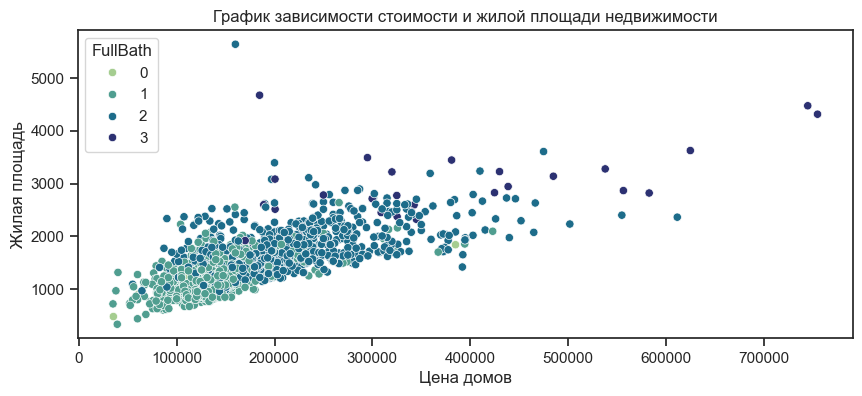

In [416]:
plt.figure(figsize=(10, 4))
sns.scatterplot(data=df,
                x='SalePrice',
                y='GrLivArea',
                hue='FullBath',
                palette="crest"
                )
plt.title('График зависимости стоимости и жилой площади недвижимости')
plt.xlabel('Цена домов')
plt.ylabel('Жилая площадь')
plt.show();

На графике видно, что между ценой недвижимости и жилой площадью существует прямая зависимость - чем больше площадь, тем выше стоимость. Однако, связь не слишком выражена, что указывает на наличие других факторов, влияющих на цену. Количество ванных комнат оказывает минимальное влияние, скорее всего, обусловленное функциональной необходимостью в соответствии с размером жилья.

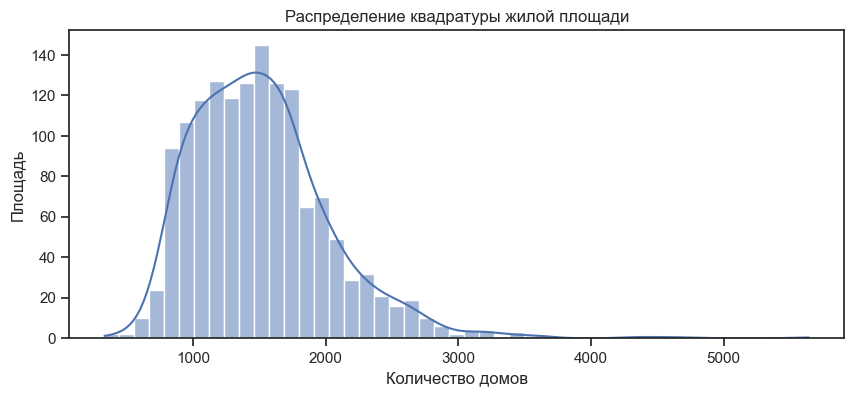

In [417]:
plt.figure(figsize=(10, 4))
sns.histplot(df['GrLivArea'], kde=True)
plt.title('Распределение квадратуры жилой площади')
plt.xlabel('Количество домов')
plt.ylabel('Площадь');

Наибольшее кол-во домов имеет площадь в диапазоне более 100 м**2

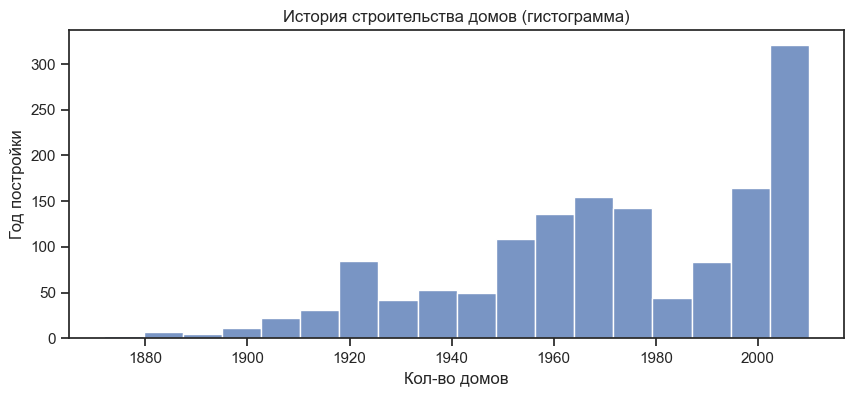

In [418]:
plt.figure(figsize=(10, 4))
sns.histplot(data=df, x='YearBuilt')
sns.set_theme(style="ticks")
plt.title('История строительства домов (гистограмма)')
plt.xlabel('Кол-во домов')
plt.ylabel('Год постройки')
plt.show();

В настоящее время мы наблюдаем беспрецедентный пик в строительстве жилья, который является историческим максимумом.

Рассмотрим количество домов с центральной системой кондиционирования и без неё.

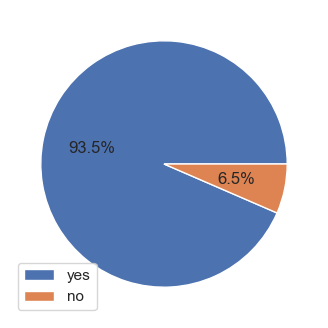

In [419]:
df_air = df['CentralAir'].value_counts()

plt.figure(figsize=(6, 4))
plt.pie(df_air, autopct='%1.1f%%')
plt.legend(['yes', 'no']);

Рассмотрим, как влияет качество материалов и отделки на цену продажи

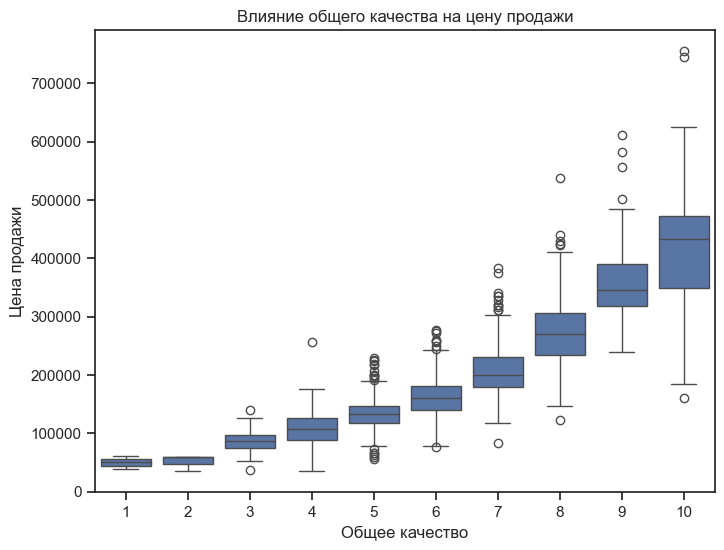

In [420]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='OverallQual', y='SalePrice', data=df)
plt.title('Влияние общего качества на цену продажи')
plt.xlabel('Общее качество')
plt.ylabel('Цена продажи')
plt.show()

Очевидно, чем выше качество материалов и отделки - тем выше стоимость продажи.

Выполните проектирование признаков путем реализации следующих преобразований: a. Работайте с категориальными переменными, применяя one-hot encoding или label encoding, в зависимости от характера переменной. b. При необходимости создайте новые характеристики, такие как общая площадь или возраст объекта недвижимости, путем объединения существующих характеристик.

In [421]:
df = pd.get_dummies(df, columns=['Street', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'BldgType', 'ExterQual', 'ExterCond', 'Foundation', 'GarageType', 'GarageFinish', 'PavedDrive', 'SaleType', 'SaleCondition'])

In [422]:
le = LabelEncoder()

for column in ['MSZoning', 'Neighborhood', 'Condition1', 'Condition2', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'Electrical', 'KitchenQual', 'Functional', 'GarageQual', 'GarageCond']:
    df[column] = le.fit_transform(df[column])

Создадим новые характеристики (общая площадь и возраст дома, которые могут быть полезны для модели).

In [423]:
df['TotalSF'] = df['TotalBsmtSF'] + df['1stFlrSF'] + df['2ndFlrSF']
df['Age'] = 2024 - df['YearBuilt']

In [425]:
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Neighborhood,Condition1,Condition2,HouseStyle,OverallQual,...,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial,TotalSF,Age
0,1,60,3,65.0,8450,5,2,2,5,7,...,False,True,False,False,False,False,True,False,2566,21
1,2,20,3,80.0,9600,24,1,2,2,6,...,False,True,False,False,False,False,True,False,2524,48
2,3,60,3,68.0,11250,5,2,2,5,7,...,False,True,False,False,False,False,True,False,2706,23
3,4,70,3,60.0,9550,6,2,2,5,7,...,False,True,True,False,False,False,False,False,2473,109
4,5,60,3,84.0,14260,15,2,2,5,8,...,False,True,False,False,False,False,True,False,3343,24


Сохраните очищенный и преобразованный набор данных в новый CSV-файл под названием 'cleaned_house_prices.csv'.

In [426]:
df.to_csv('cleaned_house_prices.csv', index=False)